In [2]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Dispositivo atual: {device}')

Dispositivo atual: cpu


In [4]:
train_raw_csv = pd.read_csv('playground_data/train.csv',index_col='id')

In [5]:
train_raw_csv = train_raw_csv[['road_type',
               'num_lanes',
               'curvature',
               'speed_limit',
               'lighting',
                  'weather',
               'road_signs_present',
               'public_road',
               #'time_of_day',
                #'holiday',
               #'school_season',
               'num_reported_accidents', 'accident_risk']].copy()

In [6]:
train_raw_csv = train_raw_csv.loc[~train_raw_csv.duplicated()].reset_index(drop=True).copy()

In [7]:
train_raw_csv.head(10)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,num_reported_accidents,accident_risk
0,urban,2,0.06,35,daylight,rainy,False,True,1,0.13
1,urban,4,0.99,35,daylight,clear,True,False,0,0.35
2,rural,4,0.63,70,dim,clear,False,True,2,0.30
3,highway,4,0.07,35,dim,rainy,True,True,1,0.21
4,rural,1,0.58,60,daylight,foggy,False,False,1,0.56
5,highway,3,0.54,70,night,foggy,True,False,0,0.61
6,highway,1,0.04,45,night,foggy,False,True,2,0.20
7,highway,2,0.33,45,daylight,clear,False,True,0,0.16
8,rural,3,0.63,25,dim,clear,True,False,2,0.18
9,urban,4,0.38,45,dim,clear,True,True,2,0.15


In [8]:
#mudar o risco de acidente para ser ou "perigoso", "tranquila", "media"
tmmp = []
for risk in train_raw_csv['accident_risk']:
  if risk >= 0.0 and risk < 0.33:
    tmmp.append('tranquila')
  elif risk >= 0.33 and risk < 0.66:
    tmmp.append('media')
  elif risk >= 0.66 and risk <= 1:
    tmmp.append('perigosa')
train_raw_csv['classification'] = tmmp

In [9]:
train_raw_csv.to_csv('playground_data/train_processed.csv')

In [10]:
train_raw_csv.head(10)

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,num_reported_accidents,accident_risk,classification
0,urban,2,0.06,35,daylight,rainy,False,True,1,0.13,tranquila
1,urban,4,0.99,35,daylight,clear,True,False,0,0.35,media
2,rural,4,0.63,70,dim,clear,False,True,2,0.30,tranquila
3,highway,4,0.07,35,dim,rainy,True,True,1,0.21,tranquila
4,rural,1,0.58,60,daylight,foggy,False,False,1,0.56,media
5,highway,3,0.54,70,night,foggy,True,False,0,0.61,media
6,highway,1,0.04,45,night,foggy,False,True,2,0.20,tranquila
7,highway,2,0.33,45,daylight,clear,False,True,0,0.16,tranquila
8,rural,3,0.63,25,dim,clear,True,False,2,0.18,tranquila
9,urban,4,0.38,45,dim,clear,True,True,2,0.15,tranquila


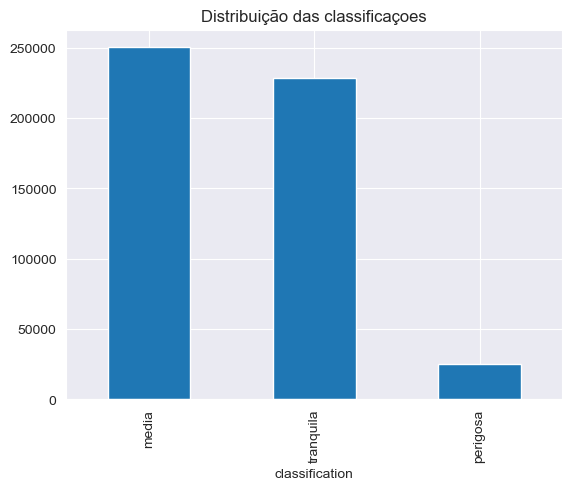

In [11]:
p = train_raw_csv['classification'].value_counts().plot(kind='bar', title='Distribuição das classificaçoes')
plt.show()

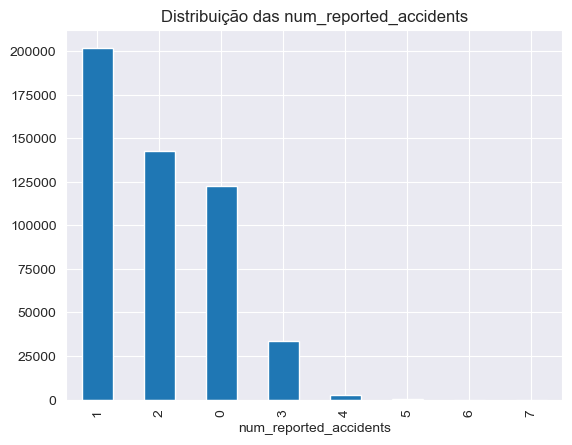

In [12]:
p = train_raw_csv['num_reported_accidents'].value_counts().plot(kind='bar', title='Distribuição das num_reported_accidents')
plt.show()

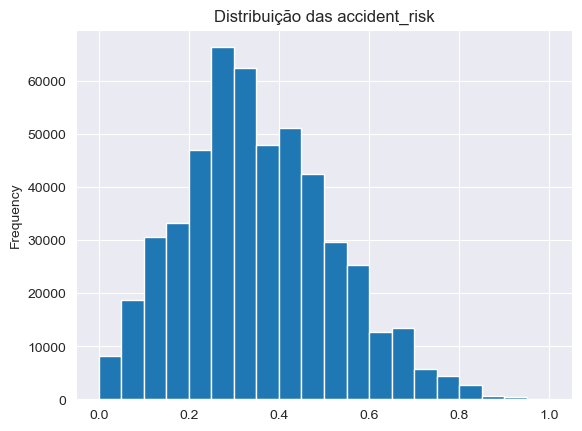

In [13]:
p = train_raw_csv['accident_risk'].plot(kind='hist', title='Distribuição das accident_risk', bins = 20)
plt.show()

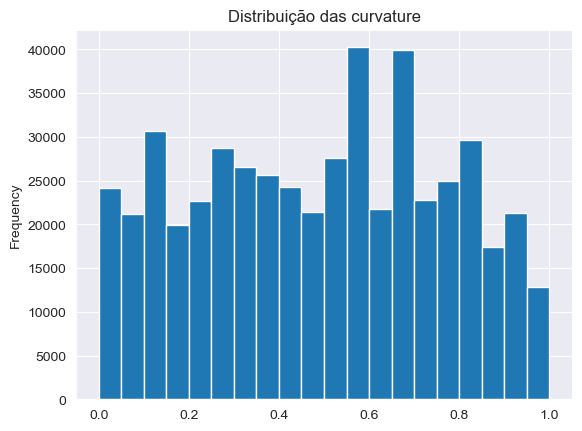

In [14]:
p = train_raw_csv['curvature'].plot(kind='hist', title='Distribuição das curvature', bins = 20)
plt.show()

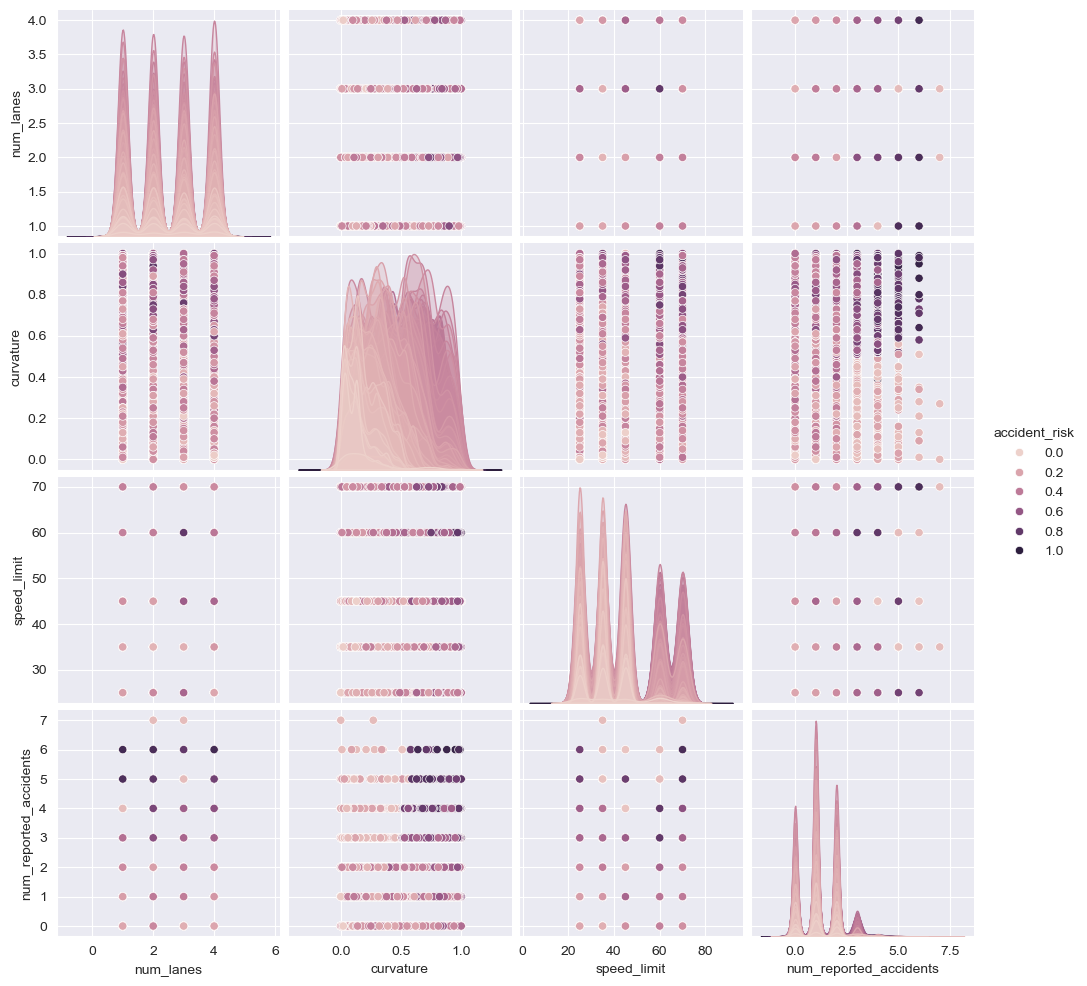

In [15]:
numeric_cols = train_raw_csv.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(train_raw_csv[numeric_cols], hue='accident_risk')

<Axes: >

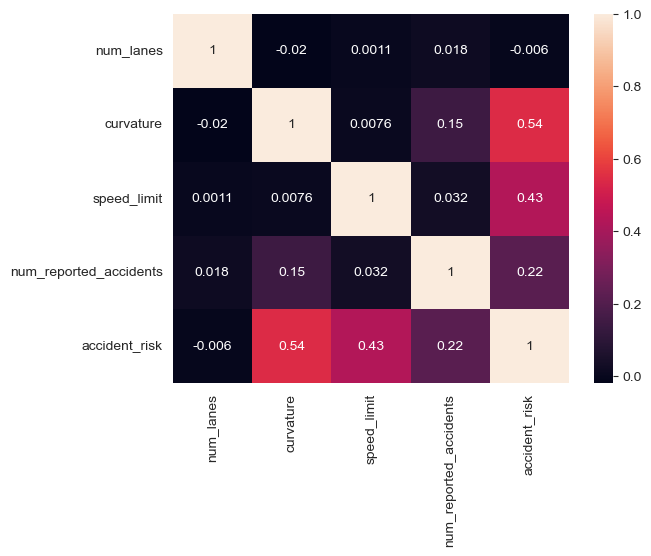

In [16]:
sns.heatmap(train_raw_csv.select_dtypes(include=['int64', 'float64']).corr(), annot=True)

In [17]:
train_raw_csv = pd.read_csv('playground_data/train_processed.csv')

In [18]:
mode = train_raw_csv['accident_risk'].mode()[0]
df_to_drop = []
for row in train_raw_csv.iterrows():
    if mode*0.6 < row[-1]['accident_risk']  < mode*1.4 :
        df_to_drop.append(row[-1])

In [19]:
df_to_drop = pd.DataFrame(df_to_drop).drop('Unnamed: 0',axis=1)

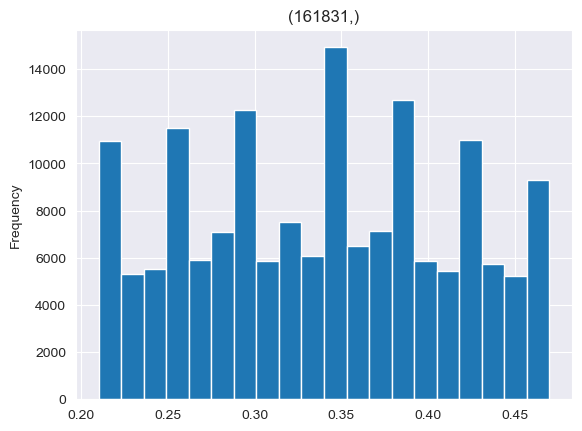

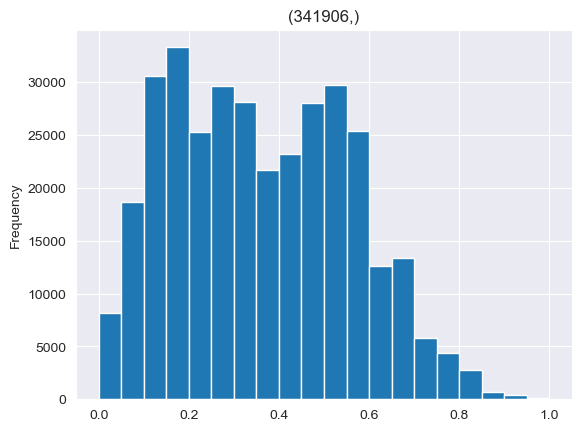

In [20]:
indices_to_drop = np.random.choice(df_to_drop.index, size=round(df_to_drop.shape[0]*0.45), replace=False)
random_choices = df_to_drop.drop(index=indices_to_drop)
test = df_to_drop.drop(random_choices.index)

p_1 = random_choices['accident_risk'].plot(kind='hist',bins=20,title=str(random_choices['accident_risk'].shape))
plt.show()
p_2 = train_raw_csv.drop(random_choices.index)['accident_risk'].plot(kind='hist',bins=20, title= str(train_raw_csv.drop(random_choices.index)['accident_risk'].shape))
plt.show()

In [21]:
train_raw_csv.drop(random_choices.index).to_csv('playground_data/train_balanced.csv')

In [23]:
pd.read_csv('playground_data/train_balanced.csv')

,Unnamed: 0.1,Unnamed: 0,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,num_reported_accidents,accident_risk,classification
0,0,0,urban,2,0.06,35,daylight,rainy,False,True,1,0.13,tranquila
1,1,1,urban,4,0.99,35,daylight,clear,True,False,0,0.35,media
2,4,4,rural,1,0.58,60,daylight,foggy,False,False,1,0.56,media
3,5,5,highway,3,0.54,70,night,foggy,True,False,0,0.61,media
4,6,6,highway,1,0.04,45,night,foggy,False,True,2,0.20,tranquila
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341901,503729,503729,rural,4,0.53,70,dim,rainy,True,True,3,0.53,media
341902,503730,503730,urban,3,0.39,35,dim,foggy,True,True,0,0.15,tranquila
341903,503731,503731,rural,2,0.53,70,dim,foggy,True,True,2,0.37,media
341904,503734,503734,urban,4,0.62,25,daylight,foggy,False,False,0,0.19,tranquila


In [24]:
train_raw_csv = pd.read_csv('playground_data/train_balanced.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

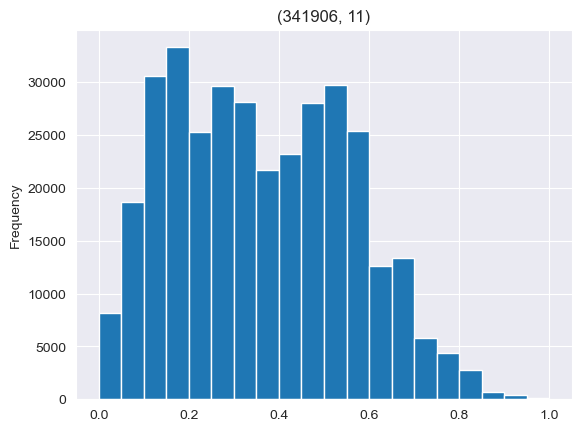

In [25]:
p_1 = train_raw_csv['accident_risk'].plot(kind='hist',bins=20, title= str(train_raw_csv.shape))
plt.show()

In [26]:
numeric_cols = train_raw_csv.select_dtypes(include=['int64', 'float64']).columns
display(train_raw_csv[numeric_cols].head())

,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
0,2,0.06,35,1,0.13
1,4,0.99,35,0,0.35
2,1,0.58,60,1,0.56
3,3,0.54,70,0,0.61
4,1,0.04,45,2,0.20


<Axes: >

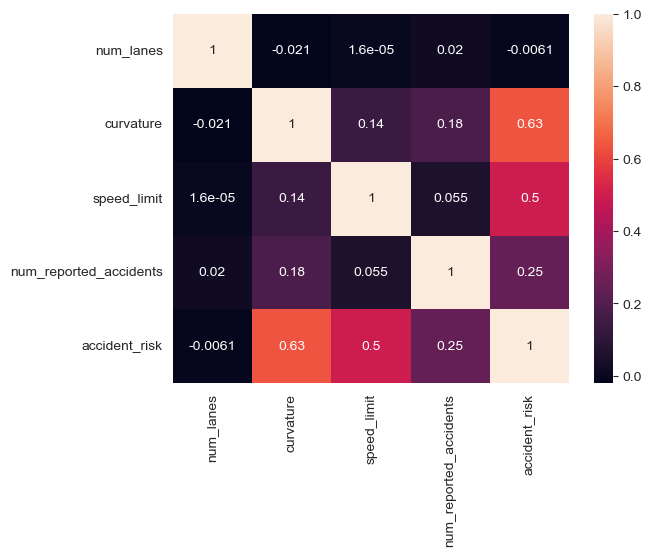

In [27]:
sns.heatmap(train_raw_csv.select_dtypes(include=['int64', 'float64']).corr(), annot=True)

In [34]:
train_csv = train_raw_csv.copy()

In [35]:
le = LabelEncoder()
for col in train_csv.columns:
    if col not in numeric_cols:
        train_csv[col] = le.fit_transform(train_csv[col])

In [36]:
train_csv

,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,num_reported_accidents,accident_risk,classification
0,2,2,0.06,35,0,2,0,1,1,0.13,2
1,2,4,0.99,35,0,0,1,0,0,0.35,0
2,1,1,0.58,60,0,1,0,0,1,0.56,0
3,0,3,0.54,70,2,1,1,0,0,0.61,0
4,0,1,0.04,45,2,1,0,1,2,0.20,2
...,...,...,...,...,...,...,...,...,...,...,...
341901,1,4,0.53,70,1,2,1,1,3,0.53,0
341902,2,3,0.39,35,1,1,1,1,0,0.15,2
341903,1,2,0.53,70,1,1,1,1,2,0.37,0
341904,2,4,0.62,25,0,1,0,0,0,0.19,2


In [37]:
train_csv.to_csv('playground_data/train_balanced_ready.csv')